In [14]:
# Distiguish Missing Values From DataSet and manipulate with NaN 
# Date: 09/24/2017
# Author: Zoey Sun

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

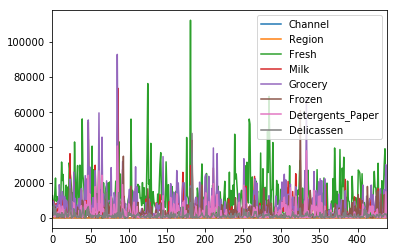

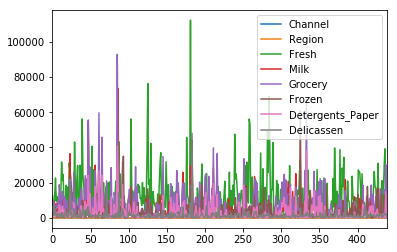

In [25]:
# load the wholesale csv file with missing data as df
df = pd.read_csv("Wholesale customers data-missing.csv")

# load the complete dataset as df2
df2 = pd.read_csv("Wholesale customers data.csv")

# plot the graphs fro with missing data & without missing data
df.plot()
plt.show()

df2.plot()
plt.show()

Generally, since there are only a few missing data in a really large dataset, it does not have a large impact on the overall graph. 

In [26]:
# Print a secription of df1 & df2
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    439.000000    438.000000   
mean     1.322727    2.543182   12000.297727   5795.719818   7972.655251   
std      0.468052    0.774272   12647.328865   7388.788560   9517.027646   
min      1.000000    1.000000       3.000000     55.000000    137.000000   
25%      1.000000    2.000000    3127.750000   1532.000000   2155.500000   
50%      1.000000    3.000000    8504.000000   3620.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7196.500000  10675.250000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        438.000000    439.000000  
mean    3071.931818       2891.719178   1525.717540  
std     4854.673333       4776.332439   2823.267359  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.250000    407.

In [27]:
# print the # of NaN values 
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                1
Grocery             2
Frozen              0
Detergents_Paper    2
Delicassen          1
dtype: int64


In [28]:
# Get the exact loc of the missing data
null_data = df[df.isnull().any(axis=1)]
null_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,1,3,20398,1137.0,NaN,4407,3.0,975.0
172,1,3,955,5479.0,NaN,333,2840.0,707.0
180,1,3,12356,NaN,8887.0,402,1382.0,2794.0
225,1,1,12680,3243.0,4157.0,660,NaN,786.0
274,1,3,894,1703.0,1841.0,744,759.0,NaN
370,2,3,39679,3944.0,4955.0,1364,NaN,2235.0


We can see that there is 1 missing data in the milk collumn, 2 in the grocery column, 2 in detergents paper and 1 in delicassen.

In [39]:
# Compared with data in df2 which has the complete original data
miss_grocery_1 = df2.iloc[75]['Grocery']
miss_grocery_2 = df2.iloc[172]['Grocery']

miss_milk = df2.iloc[180]['Milk']

miss_paper_1 = df2.iloc[225]["Detergents_Paper"]
miss_paper_2 = df2.iloc[370]["Detergents_Paper"]

miss_deli = df2.iloc[274]["Delicassen"]

print("Missing Data for the milk column is", miss_milk)
print("Missing Data for the grocery column is", miss_grocery_1,miss_grocery_2)
print("Missing Data for Detergents_Paper is", miss_paper_1,miss_paper_2)
print("Missing Data for Detergents_Paper is", miss_deli)


('Missing Data for the milk column is', 6036)
('Missing Data for the grocery column is', 3, 6536)
('Missing Data for Detergents_Paper is', 761, 523)
('Missing Data for Detergents_Paper is', 1153)


In [53]:
# Method 1: Replace the Missing Data with mean of its respective column
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5795.719818   7972.655251   
std      0.468052    0.774272   12647.328865   7380.368285   9495.324020   
min      1.000000    1.000000       3.000000     55.000000    137.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2156.500000   
50%      1.000000    3.000000    8504.000000   3627.000000   4785.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper   Delicassen  
count    440.000000        440.000000    440.00000  
mean    3071.931818       2891.719178   1525.71754  
std     4854.673333       4765.439991   2820.04996  
min       25.000000          3.000000      3.00000  
25%      742.250000        256.750000    408.25000

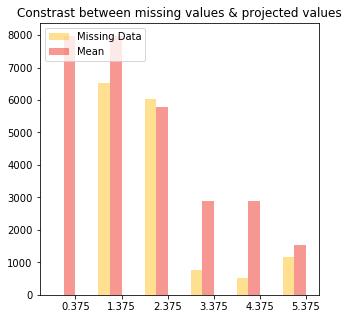

In [78]:
width = 0.25 # width of the bar

x_val = [miss_grocery_1,miss_grocery_2,miss_milk,miss_paper_1,miss_paper_2,miss_deli]

y_val = [df.mean()['Grocery'],df.mean()['Grocery'],df.mean()['Milk'],df.mean()["Detergents_Paper"],df.mean()["Detergents_Paper"],df.mean()["Delicassen"]]

x_label = ['Grocery','Grocery',"Milk","Detergents_Paper","Detergents_Paper","Delicassen"]
# df.fillna(df.mean(),inplace=True)

# Display the results with comparisions with correct values
# involves visualization

# Create a bar with missing data,
# in position pos + some width buffer,

pos = list(range(len(x_val)))

fig, ax = plt.subplots(figsize=(5,5))

plt.bar([p for p in pos ], 
        #using df['post_score'] data,
        x_val, 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222',
       label=x_label) 

plt.bar([p + width for p in pos ], 
        #using df['post_score'] data,
        y_val, 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', label=x_label) 


# Set the chart's title
ax.set_title('Constrast between missing values & projected values')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Adding the legend and showing the plot
plt.legend(['Missing Data', 'Mean'], loc='upper left')
# plt.grid()
plt.show()